NX31 - DataProject

**"Intorduction"**

In the following data project, we  will be analyzing the public sector's distribution of workforce and compare it to the privat sector's.During the analysis, we will be doing the following.
* Etablish an API connection to feed the project data
* Clean and structure this data
* Make an analysis


**"Packages imported"**

We will load in the following packages.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydst

**"Data"**
We have chosen to use the PyDST package that can load data from Statistics Denmark using an API call, with only given it the table id.
We start off, by finding the variables that are present in the table, so we can see what the table contains.

In [2]:
dst = pydst.Dst(lang='en')

FTEG_variables = dst.get_variables(table_id = 'OBESK2')
FTEG_variables

,elimination,id,text,time,values
0,True,SEKTOR,sector,False,"[{'id': '1032', 'text': 'General government'},..."
1,False,Tid,time,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


"Dictornaries"

In [3]:
columns_dict = {}
columns_dict['SEKTOR'] = 'Sector'
columns_dict['TID'] = 'Quarter'
columns_dict['INDHOLD'] = 'FTE'

var_dict = {}
var_dict['Central government'] = 'Central'
var_dict['Regional government'] = 'Regional'
var_dict['Municipal government'] = 'Municipal'
var_dict['Social security funds'] = 'Social security funds'
var_dict['General government'] = 'Total'

"import data"

In [4]:
FTEG_raw = dst.get_data(table_id = 'OBESK2', variables = {'SEKTOR':['*'], 'Tid':['*']})
FTEG_raw

,SEKTOR,TID,INDHOLD
0,Central government,2008Q1,164276
1,Regional government,2008Q1,111410
2,Municipal government,2008Q1,431690
3,Social security funds,2008Q1,1921
4,General government,2008Q1,709297
5,Central government,2008Q2,167654
6,Regional government,2008Q2,107305
7,Municipal government,2008Q2,438649
8,Social security funds,2008Q2,1913
9,General government,2008Q2,715521


"renamer and raplace

In [5]:
FTEG_raw.rename(columns = columns_dict, inplace = True)

for key, value in var_dict.items():
    FTEG_raw.Sector.replace(key, value, inplace = True)

FTEG_raw

,Sector,Quarter,FTE
0,Central,2008Q1,164276
1,Regional,2008Q1,111410
2,Municipal,2008Q1,431690
3,Social security funds,2008Q1,1921
4,Total,2008Q1,709297
5,Central,2008Q2,167654
6,Regional,2008Q2,107305
7,Municipal,2008Q2,438649
8,Social security funds,2008Q2,1913
9,Total,2008Q2,715521


"transponere and copies"

In [6]:
FTEG = FTEG_raw.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')
FTEG


Sector,Central,Municipal,Regional,Social security funds,Total
Quarter,,,,,
2008Q1,164276,431690,111410,1921,709297
2008Q2,167654,438649,107305,1913,715521
2008Q3,166319,433840,111262,1849,713270
2008Q4,170749,441479,114385,1843,728455
2009Q1,169315,442231,114244,1843,727633
2009Q2,172790,449778,116310,1873,740750
2009Q3,170775,445803,115956,1889,734423
2009Q4,173914,450609,118369,1896,744787
2010Q1,172563,450873,117452,1860,742748


"Descirbetive statistics"

In [7]:
FTEG_raw.groupby(['Sector']).describe()

FTE                                                    \
                      count           mean           std       min        25%   
Sector                                                                          
Central                44.0  173199.977273   2665.832350  164276.0  172505.00   
Municipal              44.0  430653.113636  12017.772657  413069.0  420759.25   
Regional               44.0  118347.772727   3491.849366  107305.0  116019.00   
Social security funds  44.0    1940.386364     96.370462    1843.0    1876.00   
Total                  44.0  724141.159091  10917.445550  706772.0  716269.75   

                                                      
                            50%        75%       max  
Sector                                                
Central                173527.5  174949.50  177641.0  
Municipal              428491.5  439356.50  457033.0  
Regional               119047.0  121126.25  122494.0  
Social security funds    1902.0    1987.75    2147.0  
Total                  722094.5  728439.25  751954.0

"simple plot of all avalible data"

Text(0.5, 1.0, 'Public full-time employed')

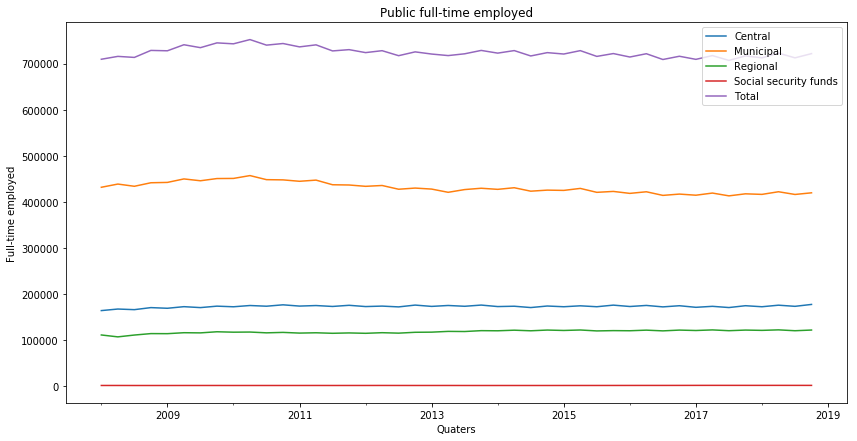

In [8]:
fig1, ax = plt.subplots(figsize=(14,7))
FTEG_raw['Quarter'] = pd.to_datetime(FTEG_raw['Quarter'])
FTEG_raw.set_index('Quarter').groupby('Sector')['FTE'].plot(x="Quarter", legend=True, ax=ax);
ax.set_ylabel("Full-time employed")
ax.set_xlabel('Quaters')
ax.set_title("Public full-time employed")

"Relative size"

"making dataframes and mergeing"

In [9]:
rc_central = pd.DataFrame(data=FTEG['Central']/FTEG['Total']*100)
rc_municipal = pd.DataFrame(FTEG['Municipal']/FTEG['Total']*100)
rc_regional = pd.DataFrame(FTEG['Regional']/FTEG['Total']*100)
rc_social = pd.DataFrame(FTEG['Social security funds']/FTEG['Total']*100)

rFTEG_1 = pd.merge(rc_central, rc_municipal, on='Quarter')
rFTEG_2 = pd.merge(rFTEG_1, rc_regional, on='Quarter')
rFTEG = pd.merge(rFTEG_2, rc_social, on='Quarter')

rFTEG


,0_x,0_y,0_x,0_y
Quarter,,,,
2008Q1,23.160397,60.861670,15.707102,0.270832
2008Q2,23.431038,61.304839,14.996765,0.267358
2008Q3,23.317818,60.824092,15.598862,0.259229
2008Q4,23.439883,60.604842,15.702411,0.253001
2009Q1,23.269285,60.776655,15.700772,0.253287
2009Q2,23.326358,60.719271,15.701654,0.252852
2009Q3,23.252948,60.701122,15.788721,0.257209
2009Q4,23.350837,60.501727,15.893000,0.254569
2010Q1,23.233048,60.703361,15.813169,0.250421


"renaming"


In [10]:
rFTEG.columns = ['Central', 'Municipal', 'Regional', 'Social']

rFTEG

,Central,Municipal,Regional,Social
Quarter,,,,
2008Q1,23.160397,60.861670,15.707102,0.270832
2008Q2,23.431038,61.304839,14.996765,0.267358
2008Q3,23.317818,60.824092,15.598862,0.259229
2008Q4,23.439883,60.604842,15.702411,0.253001
2009Q1,23.269285,60.776655,15.700772,0.253287
2009Q2,23.326358,60.719271,15.701654,0.252852
2009Q3,23.252948,60.701122,15.788721,0.257209
2009Q4,23.350837,60.501727,15.893000,0.254569
2010Q1,23.233048,60.703361,15.813169,0.250421


Text(0.5, 1.0, 'Share of total public employment')

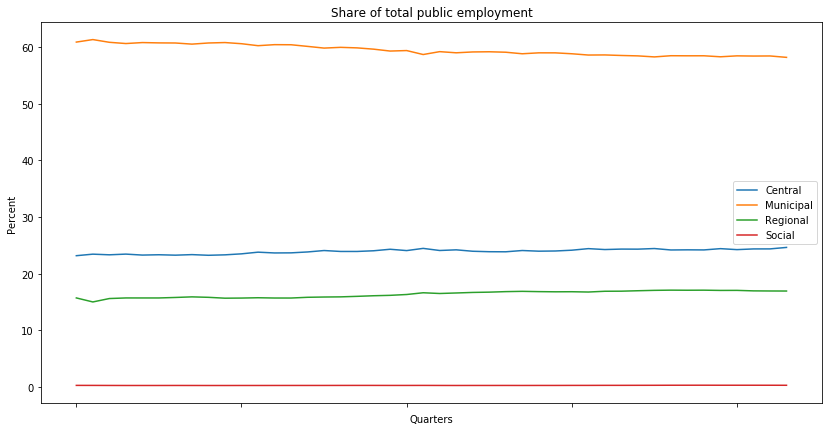

In [11]:
fig2, ax = plt.subplots(figsize=(14,7))
rFTEG.plot(legend=True, ax=ax);

rFTEG.reset_index(drop=True)
FTEG_raw.set_index('Quarter')
rFTEG.index = pd.DatetimeIndex(data=rFTEG.index)

ax.set_xlabel("Quarters")
ax.set_ylabel("Percent")
ax.set_title("Share of total public employment")

# move the legend, put numbers on the x-axis, maybe ""%"" on y-axis


"new data"

"variables"

In [12]:
# download new data and clean it

dst = pydst.Dst(lang='en')

EM_variables = dst.get_variables(table_id = 'LBESK21')
EM_variables

,elimination,id,text,time,values
0,False,TAL,unit,False,"[{'id': '1020', 'text': 'Employees'}, {'id': '..."
1,True,SEKTOR,sector,False,"[{'id': '1000', 'text': 'All sectors'}, {'id':..."
2,False,Tid,time,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


"dicts"

In [13]:
columns_dict3 = {}
columns_dict3['TAL'] = 'remove one of them? - lønmodtagere'
columns_dict3['SEKTOR'] = 'Sector'
columns_dict3['TID'] = 'Quarter'
columns_dict3['INDHOLD'] = 'FTE'

var_dict2 = {}
var_dict2['All sectors'] = 'Total'
var_dict2['Central government'] = 'Central'
var_dict2['Regional government'] = 'Regional'
var_dict2['Municipal government'] = 'Municipal'
var_dict2['Social security funds'] = 'Social'
var_dict2['Public corporations'] = 'Public corp'
var_dict2['Private corporations'] = 'Private corp'
var_dict2['Private nonprofit organizations'] = 'Private NPO'
var_dict2['Sector not stated'] = 'SNS'

"get data"

In [14]:
EM_raw = dst.get_data(table_id = 'LBESK21', variables = {'TAL':['*'], 'SEKTOR':['*'], 'Tid':['*']})
EM_raw

,TAL,SEKTOR,TID,INDHOLD
0,Full-time employees,All sectors,2008Q1,2245921
1,Full-time employees,Central government,2008Q1,164276
2,Full-time employees,Regional government,2008Q1,111410
3,Full-time employees,Municipal government,2008Q1,431690
4,Full-time employees,Social security funds,2008Q1,1921
5,Full-time employees,Public corporations,2008Q1,66524
6,Full-time employees,Private corporations,2008Q1,1419034
7,Full-time employees,Private nonprofit organizations,2008Q1,50890
8,Full-time employees,Sector not stated,2008Q1,176
9,Employees,All sectors,2008Q1,2685665


"rename"

In [16]:
EM_raw.rename(columns = columns_dict3, inplace = True)

for key, value in var_dict2.items():
    EM_raw.Sector.replace(key, value, inplace = True)

EM_raw

,remove one of them? - lønmodtagere,Sector,Quarter,FTE
0,Full-time employees,Total,2008Q1,2245921
1,Full-time employees,Central,2008Q1,164276
2,Full-time employees,Regional,2008Q1,111410
3,Full-time employees,Municipal,2008Q1,431690
4,Full-time employees,Social,2008Q1,1921
5,Full-time employees,Public corp,2008Q1,66524
6,Full-time employees,Private corp,2008Q1,1419034
7,Full-time employees,Private NPO,2008Q1,50890
8,Full-time employees,SNS,2008Q1,176
9,Employees,Total,2008Q1,2685665


"describe"

In [18]:
EM_raw.groupby(['Sector']).describe()

FTE                                                      \
             count          mean            std        min         25%   
Sector                                                                   
Central       88.0  1.852380e+05   12502.326539   164276.0   173527.75   
Municipal     88.0  4.661050e+05   37460.369578   413069.0   428853.75   
Private NPO   88.0  6.449664e+04    9742.488838    50579.0    54850.50   
Private corp  88.0  1.499315e+06  169861.230961  1256157.0  1330263.00   
Public corp   88.0  5.956807e+04    6098.314493    49765.0    55070.25   
Regional      88.0  1.250018e+05    7360.008627   107305.0   119120.00   
SNS           88.0  2.302500e+02      61.327883      131.0      175.50   
Social        88.0  2.033807e+03     135.864271     1843.0     1903.00   
Total         88.0  2.401989e+06  230050.725597  2090889.0  2168192.00   

                                                
                    50%         75%        max  
Sector                                          
Central        182418.5   197879.75   202006.0  
Municipal      472505.5   497782.75   526552.0  
Private NPO     62941.5    72676.75    83356.0  
Private corp  1506338.0  1637565.50  1809460.0  
Public corp     58913.0    63626.00    73789.0  
Regional       123723.0   132336.00   135208.0  
SNS               231.5      284.50      338.0  
Social           2047.5     2112.00     2347.0  
Total         2408689.5  2595487.00  2773787.0

"compare public and private to total employment"

"" skriv altid slut kommentar så vi ved hvor vi er og om det er den rigtige""
